# Example: Introduction to Frequency Domain Features

This notebook illustrates the concept of frequency domain features in the context of activity recognition using accelerometer data. We'll focus on two key features:

1. Dominant Frequency: The most significant rhythmic component in the data.
2. Signal Energy: A measure of the overall intensity of variations in the data.

We'll generate synthetic data for different activities (walking, running, cycling) and analyze their frequency domain characteristics. This approach can help in distinguishing between different types of periodic activities.

Let's start by generating some synthetic walking data and visualizing it in both time and frequency domains.


In [1]:
# Frequency Domain Features Illustration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# Set plot styles
plt.style.use('default')  # Changed from 'seaborn' to 'default'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 12})


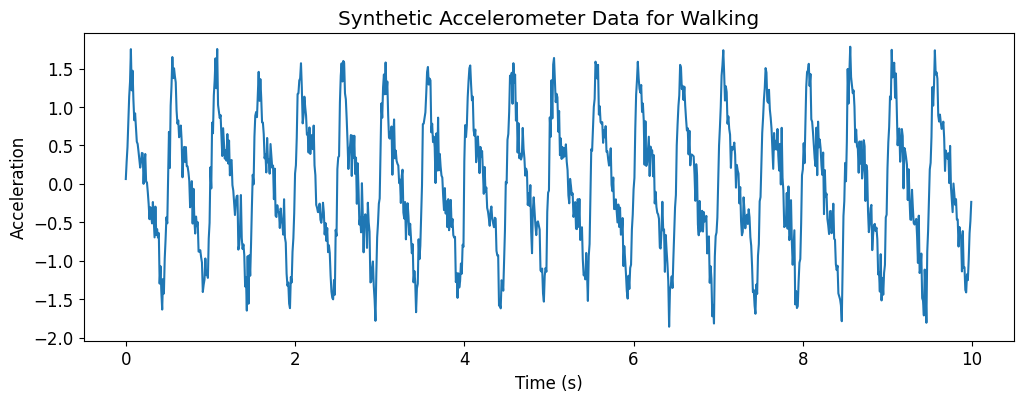

In [2]:

def generate_walking_data(duration=10, sampling_rate=100):
    """
    Generates synthetic accelerometer data for walking.
    
    This function simulates walking data by combining sine waves at the fundamental walking frequency
    and its harmonics, then adding some random noise to make it more realistic.
    
    Parameters:
    - duration: Length of the data in seconds
    - sampling_rate: Number of samples per second
    
    Returns:
    - t: Time array
    - walking_data: Synthetic accelerometer data
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    
    # Simulate walking frequency (approx. 2 Hz) and its harmonics
    walking_freq = 2
    signal = (np.sin(2 * np.pi * walking_freq * t) + 
              0.5 * np.sin(2 * np.pi * 2 * walking_freq * t) +
              0.3 * np.sin(2 * np.pi * 3 * walking_freq * t))
    
    # Add some noise
    noise = np.random.normal(0, 0.2, len(t))
    
    return t, signal + noise

t, walking_data = generate_walking_data()

# Plot the synthetic walking data
plt.figure(figsize=(12, 4))
plt.plot(t, walking_data)
plt.title('Synthetic Accelerometer Data for Walking')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.show()


## Fast Fourier Transform (FFT)

The Fast Fourier Transform is a crucial algorithm that allows us to convert our time-domain signal into its frequency-domain representation. This transformation reveals the periodic components within our data, which are often not easily visible in the time domain.


### 2.1 Perform FFT on the walking data (show mirror symmetry and why we knock off the negative)

This section demonstrates the symmetry in the Fast Fourier Transform (FFT) output and explains why we typically use only the positive frequency components. The FFT output for real-valued signals (like our walking data) exhibits symmetry around the zero frequency. The negative frequencies are mirror images of the positive frequencies. 
We typically use only the positive half because:
- It contains all the unique information.
- Negative frequencies are harder to interpret physically.
- Using only the positive half simplifies further analysis and visualization.

By focusing on the positive frequencies, we can more easily identify the dominant rhythmic components of our walking signal.

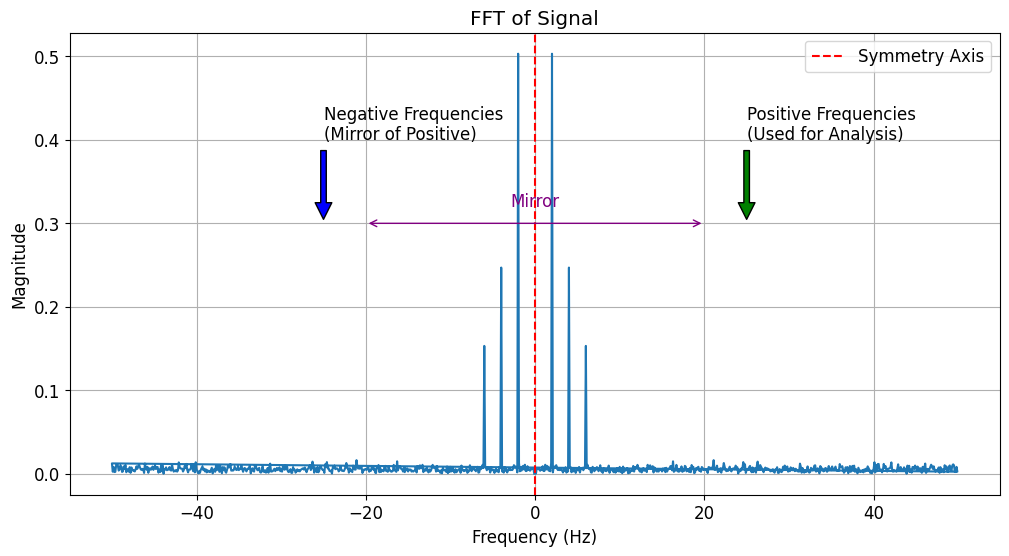

In [3]:
# 2.1 Perform FFT on the walking data (show mirror symmetry and why we knock off the negative)

N = len(t)
T = t[1] - t[0]  # sampling interval

yf = fft(walking_data)

# Generate frequency array
xf = fftfreq(N, T)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf)/N)
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Highlight symmetry
plt.axvline(x=0, color='r', linestyle='--', label='Symmetry Axis')
plt.annotate('Positive Frequencies\n(Used for Analysis)', xy=(25, 0.3), xytext=(25, 0.4),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Negative Frequencies\n(Mirror of Positive)', xy=(-25, 0.3), xytext=(-25, 0.4),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Add arrow to show mirroring
plt.annotate('', xy=(20, 0.3), xytext=(-20, 0.3),
             arrowprops=dict(arrowstyle='<->', color='purple'))
plt.text(0, 0.32, 'Mirror', color='purple', ha='center')

plt.legend()
plt.grid(True)
plt.show()


### 2.2 Perform FFT on the walking data (show why we plot actual frequency rather than bin value)

This section illustrates the importance of using actual frequency values on the x-axis instead of FFT bin numbers. Plotting the FFT output against actual frequency values rather than bin numbers is useful because:
- It provides meaningful physical interpretation. Actual frequencies (in Hz) relate directly to the rhythms in our walking data.
- It allows for easy identification of specific frequency components, such as the fundamental frequency of the walking pattern.
- It facilitates comparison between signals with different sampling rates or durations.

The actual frequency values are calculated using the fftfreq function, which takes into account the sampling rate of our original signal.

Text(0, 0.5, 'Magnitude')

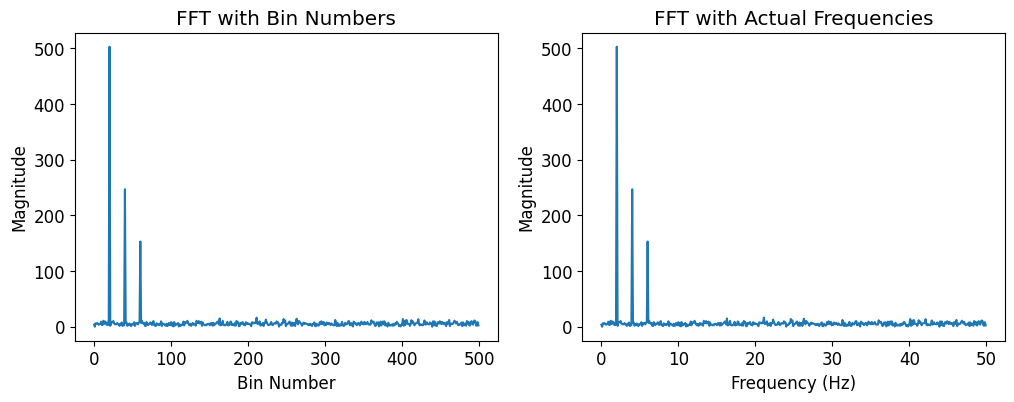

In [4]:
# 2.2 Perform FFT on the walking data (show why we plot actual frequency rather than bin value)

N = len(t)
T = t[1] - t[0]  # sampling interval

yf = fft(walking_data)
xf = fftfreq(N, T)[:N//2]

# Plot using bin numbers
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.abs(yf[:N//2]))
plt.title('FFT with Bin Numbers')
plt.xlabel('Bin Number')
plt.ylabel('Magnitude')

# Plot using actual frequencies
xf = fftfreq(N, T)[:N//2]
plt.subplot(122)
plt.plot(xf, np.abs(yf[:N//2]))
plt.title('FFT with Actual Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


### 2.3 Perform FFT on the walking data (show why we normalize)

This section shows how we normalize the FFT output. Normalizing the FFT output is needed for several reasons:
- Scale Independence: Normalization makes the FFT output independent of the number of samples, allowing comparison between signals of different lengths.
- Relative Strength: Normalizing to the maximum value helps in understanding the relative strengths of different frequency components.
- Consistency: Normalization ensures consistent interpretation across different datasets or experimental conditions.

The choice of normalization method depends on the specific analysis goals. We normalize by the number of samples, N, here but normalizing to the maximum value is also sometimes useful for comparing relative strengths of frequency components.

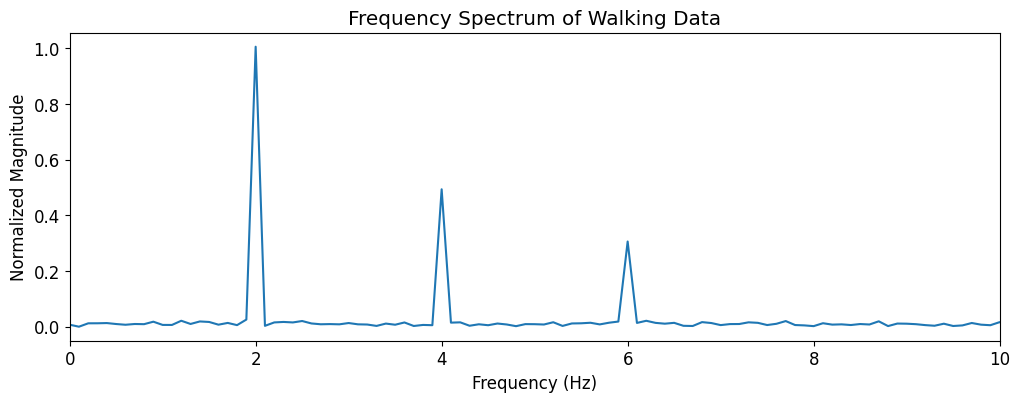

In [5]:
# 2.3 Perform FFT on the walking data (show why we normalize)

N = len(t)
T = t[1] - t[0]  # sampling interval

yf = fft(walking_data)
xf = fftfreq(N, T)[:N//2]

# Plot the frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Spectrum of Walking Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.xlim(0, 10)  # Limit x-axis to 0-10 Hz for better visibility
plt.show()


## Extracting Frequency Domain Features

Now that we have our data in the frequency domain, we can extract useful features. We'll focus on two key features: Dominant Frequency and Signal Energy.


In [6]:
# 3. Extract Dominant Frequency

def get_dominant_frequency(xf, yf):
    """
    Extracts the dominant frequency from the FFT results.
    
    This function finds the frequency with the highest magnitude in the frequency spectrum,
    which represents the most significant rhythmic component of the activity.
    
    Parameters:
    - xf: Frequency array
    - yf: FFT result array
    
    Returns:
    - dominant_freq: The frequency with the highest magnitude
    """
    peaks, _ = find_peaks(np.abs(yf[:N//2]), height=0)
    dominant_freq = xf[peaks[np.argmax(np.abs(yf[peaks]))]]
    return dominant_freq

dominant_freq = get_dominant_frequency(xf, yf)
print(f"Dominant Frequency: {dominant_freq:.2f} Hz")


Dominant Frequency: 2.00 Hz


In [7]:
# 4. Calculate Signal Energy

def calculate_signal_energy(yf):
    """
    Signal energy gives an overall measure of the intensity of variations in the accelerometer data.
    It's calculated as the sum of the squared magnitudes of the FFT results.
    
    Parameters:
    - yf: FFT result array
    
    Returns:
    - signal_energy: The calculated signal energy
    """
    return np.sum(np.abs(yf)**2) / len(yf)

signal_energy = calculate_signal_energy(yf)
print(f"Signal Energy: {signal_energy:.2f}")



Signal Energy: 713.15


## Analyzing Different Activities

Now that we have methods to generate data and extract frequency domain features, let's apply them to different activities and compare the results.


         Dominant Frequency  Signal Energy
Walking                 2.0     535.403622
Running                 3.0     620.173365
Cycling                 1.5     510.165708


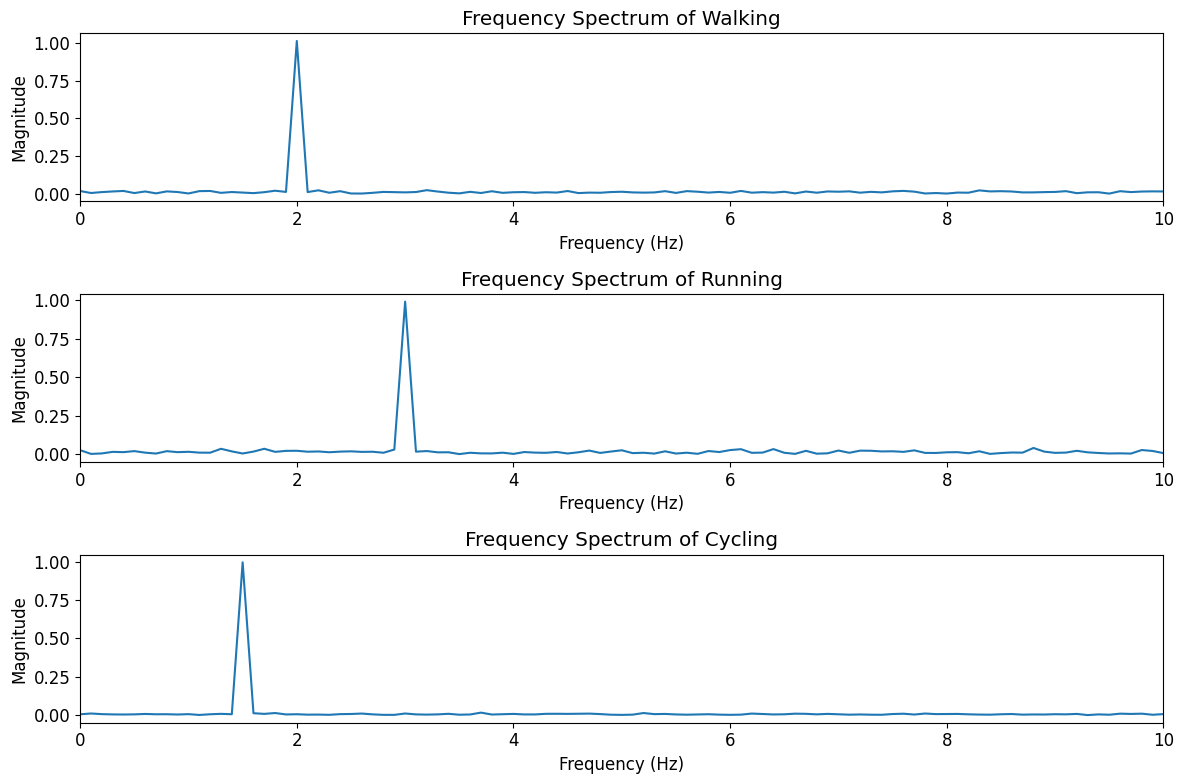

In [8]:
# 5. Generate and analyze data for different activities

def generate_activity_data(duration=10, sampling_rate=100, freq=2, noise_level=0.2):
    """
    Generates synthetic data for different activities.
    
    This function creates simple sinusoidal data with added noise to simulate different activities.
    The frequency and noise level are adjusted to represent different types of activities.
    
    Parameters:
    - duration: Length of the data in seconds
    - sampling_rate: Number of samples per second
    - freq: The main frequency of the activity
    - noise_level: The amount of random noise to add
    
    Returns:
    - t: Time array
    - data: Synthetic activity data
    """
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(0, noise_level, len(t))
    return t, signal + noise

activities = {
    'Walking': {'freq': 2, 'noise': 0.2},
    'Running': {'freq': 3, 'noise': 0.3},
    'Cycling': {'freq': 1.5, 'noise': 0.1}
}

results = {}

for activity, params in activities.items():
    t, data = generate_activity_data(freq=params['freq'], noise_level=params['noise'])
    yf = fft(data)
    xf = fftfreq(len(t), t[1] - t[0])[:len(t)//2]
    
    dominant_freq = get_dominant_frequency(xf, yf)
    signal_energy = calculate_signal_energy(yf)
    
    results[activity] = {
        'Dominant Frequency': dominant_freq,
        'Signal Energy': signal_energy
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot frequency spectra for different activities
plt.figure(figsize=(12, 8))
for i, (activity, params) in enumerate(activities.items(), 1):
    t, data = generate_activity_data(freq=params['freq'], noise_level=params['noise'])
    yf = fft(data)
    xf = fftfreq(len(t), t[1] - t[0])[:len(t)//2]
    
    plt.subplot(3, 1, i)
    plt.plot(xf, 2.0/len(t) * np.abs(yf[0:len(t)//2]))
    plt.title(f'Frequency Spectrum of {activity}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 10)

plt.tight_layout()
plt.show()